# Scikit-learnを使用したクラスタリングとステップワイズ法による変数選択

## データロード

In [1]:
import seaborn as sns # seabornのサンプルデータを使用する
df = sns.load_dataset("iris") # アヤメのがくや花びらの長さ&幅、品種のデータ

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


sepal_lengthががくの長さ、sepal_widthががくの幅、petal_lengthが花びらの長さ、petal_widthが花びらの幅、speciesが品種である。  
各品種の写真は[Wikipediaのページ](https://en.wikipedia.org/wiki/Iris_flower_data_set)の右下にある。ちなみに眞田は写真を見ても何が違うのか良くわからない。しかし、機械学習を使えば高い精度で識別できるモデルができるので、アヤメの品種識別の観点では、AIは人(眞田)を超えたと言えるだろう。

ちなみに、このアヤメのデータはロナルド・フィッシャーの1936年の論文で使用されたデータであり、フィッシャーのアヤメデータセットと呼ばれる。  
フィッシャーは英国の統計学者/生物学者/遺伝学者/優生学者で、最尤推定法、有意差検定、分散分析、実験計画法などを発明した偉大な統計学者であり、20世紀最大の統計学者と言われることもある。  
しかし、彼のせいでベイズ統計学者が日陰に追いやられていたことも事実である。  

## クラスタリング

In [3]:
from sklearn.mixture import GaussianMixture # 混合ガウス分布
from sklearn.cluster import KMeans # K平均法

In [4]:
data = df.iloc[:, :4] # 品種以外のデータを取り出す

In [5]:
gmm = GaussianMixture(n_components=3) # クラスタ数3に設定したgmmモデルのインスタンス

In [6]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
gmm.fit(data) # 学習

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
pred = gmm.predict(data) # クラスタリング

In [9]:
pred # クラスタリング結果

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

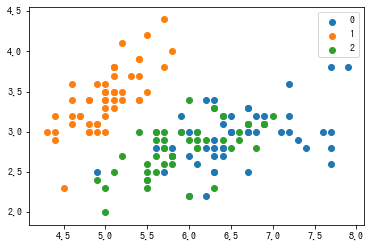

In [10]:
# クラスタ結果をプロット
%matplotlib inline
import matplotlib.pyplot as plt

# 3つのクラスタ毎にプロット
for i in range(3):
    # 4次元のプロットはできないので、がくの長さと幅で2次元プロット
    tmp = data.loc[pred == i, ["sepal_length", "sepal_width"]] 
    # 散布図を書く関数はscatter。引数はx(横軸)の値とy(縦軸)の値。キーワード引数labelで凡例のためのラベルをつけている
    plt.scatter(tmp.sepal_length, tmp.sepal_width, label=i)
plt.legend() # 凡例を表示

In [11]:
# bicを計算
gmm.bic(data)

580.8612784697606

## 最適なクラスタ数の選択

In [12]:
# クラスタ数を1 ~ 5で試して、bicが最小となるクラスタ数を探す
bic = [0] * 5 # bicを記録するリスト。bic=[0,0,0,0,0]と書いてもよい
for i in range(5):
    gmm = GaussianMixture(n_components=i+1) # モデルのインスタンス
    gmm.fit(data) # 訓練
    bic[i] = gmm.bic(data) # bicを計算して、リストに保存

In [13]:
bic # クラスタ2個が最小(574)

[829.9781545093942,
 574.0178327207461,
 580.8594247694391,
 622.1725152287748,
 674.3855163882338]

## 宿題

- **ステップワイズ法の理解:** アヤメデータセットはsepal_lengthなど、品種を除いて4つの変数を持っています。この4変数に対して、フォワードのステップワイズ法を使用して、BICが最小となるような変数の組を求めて下さい。

In [15]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
